In [1]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

# Constants
M_p = 1.0  # Reduced Planck mass (normalized)
M = 1.0   # Mass scale of the potential
gamma = 1  # Pressureless dust (matter)

# Potential V(phi) = M^{4-n} phi^{-n} (n=1 here)
def V(phi):
    return M**3 / phi

def V_phi(phi):     # First derivative of the potential
    return -M**3 / phi**2

def lambda_func(phi):    # Steepness of the potential
    return -M_p * V_phi(phi) / V(phi)**1.5

In [2]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

# Constants
M_p = 1.0  # Reduced Planck mass (normalized)
M = 1.0   # Mass scale of the potential
gamma = 1  # Pressureless dust (matter)

# Potential V(phi) = M^{4-n} phi^{-n} (n=1 here)
def V(phi):
    return M**3 / phi

def V_phi(phi):     # First derivative of the potential
    return -M**3 / phi**2

def lambda_func(phi):    # Steepness of the potential
    return -M_p * V_phi(phi) / V(phi)**1.5

# Autonomous system equations
def autonomous_system(N, vars, gamma):
    x, y, phi = vars
    
    # Compute lambda and Gamma from the potential
    # Note: V_phi_phi (second derivative of the potential)
    lam = lambda_func(phi)
    Gamma = (V(phi) * (-2 * M**3 / phi**3)) / (V_phi(phi))**2  # V_phi_phi = 2M^3/phi^3
    
    # Equations x', y', phi' in terms of N
    dx_dN = -(1 - x**2) * (3*x - np.sqrt(3)*lam*y)
    dy_dN = (y/2) * (-np.sqrt(3)*lam*x*y - 3*(gamma - x**2)*y**2 / np.sqrt(1 - x**2) + 3*gamma)
    dphi_dN = x * np.exp(N)   # phi' = x * a' (a' = e^N, since N = ln(a)) ; Directly relates phi to x and N.
    return [dx_dN, dy_dN, dphi_dN]

In [3]:
# Initial conditions (N = ln(a), starts at N=0)
x_i = 0.8
y_i = 5.0e-4
phi_i = 1.0  # Initial field value (arbitrary, since lambda_i is fixed)
initial_conditions = [x_i, y_i, phi_i]

In [4]:
plt.rcParams.update({
    'font.size': 12,
    'mathtext.fontset': 'cm',
    'axes.labelsize': 12,
    'axes.titlesize': 14,
    'legend.fontsize': 10,
    'xtick.labelsize': 13,
    'ytick.labelsize': 13,
    'figure.dpi': 300,
    'savefig.dpi': 300,
    'figure.autolayout': True,
    'axes.linewidth': 1.0,
    'lines.linewidth': 1.5
})

In [5]:
# Solve the ODE system
N_span = (0, 200)  # From N=0 to N=200 (covers late-time behavior)
solution = solve_ivp(
    autonomous_system,
    N_span,
    initial_conditions,
    args=(gamma,),
    method='LSODA',
    dense_output=True,
    rtol=1e-6,
    atol=1e-8
)

In [6]:
# Extract solutions
N_vals = np.linspace(0, 20, 10000) # Dense output for N values 1000 points , tweak value to see clear transion phases.
x_vals, y_vals, phi_vals = solution.sol(N_vals)

# Compute derived quantities
lam_vals = lambda_func(phi_vals) # Steepness of the potential
Omega_phi = y_vals**2 / np.sqrt(1 - x_vals**2) # Fractional energy density of the scalar field
Omega_B = 1 - Omega_phi # Fractional energy density of the background (matter)
gamma_phi = x_vals**2   # Equation of state parameter for the scalar field
q = 1.5 * gamma - 1 - 1.5 * (gamma - x_vals**2) * y_vals**2 / np.sqrt(1 - x_vals**2) # Deceleration parameter

# Stable fixed points of the dynamical system (late-time attractors). 
y_s = np.sqrt((np.sqrt(lam_vals**4 + 36) - lam_vals**2) / 6) # Critical point for y
x_c = lam_vals * y_s / np.sqrt(3) # Critical point for x

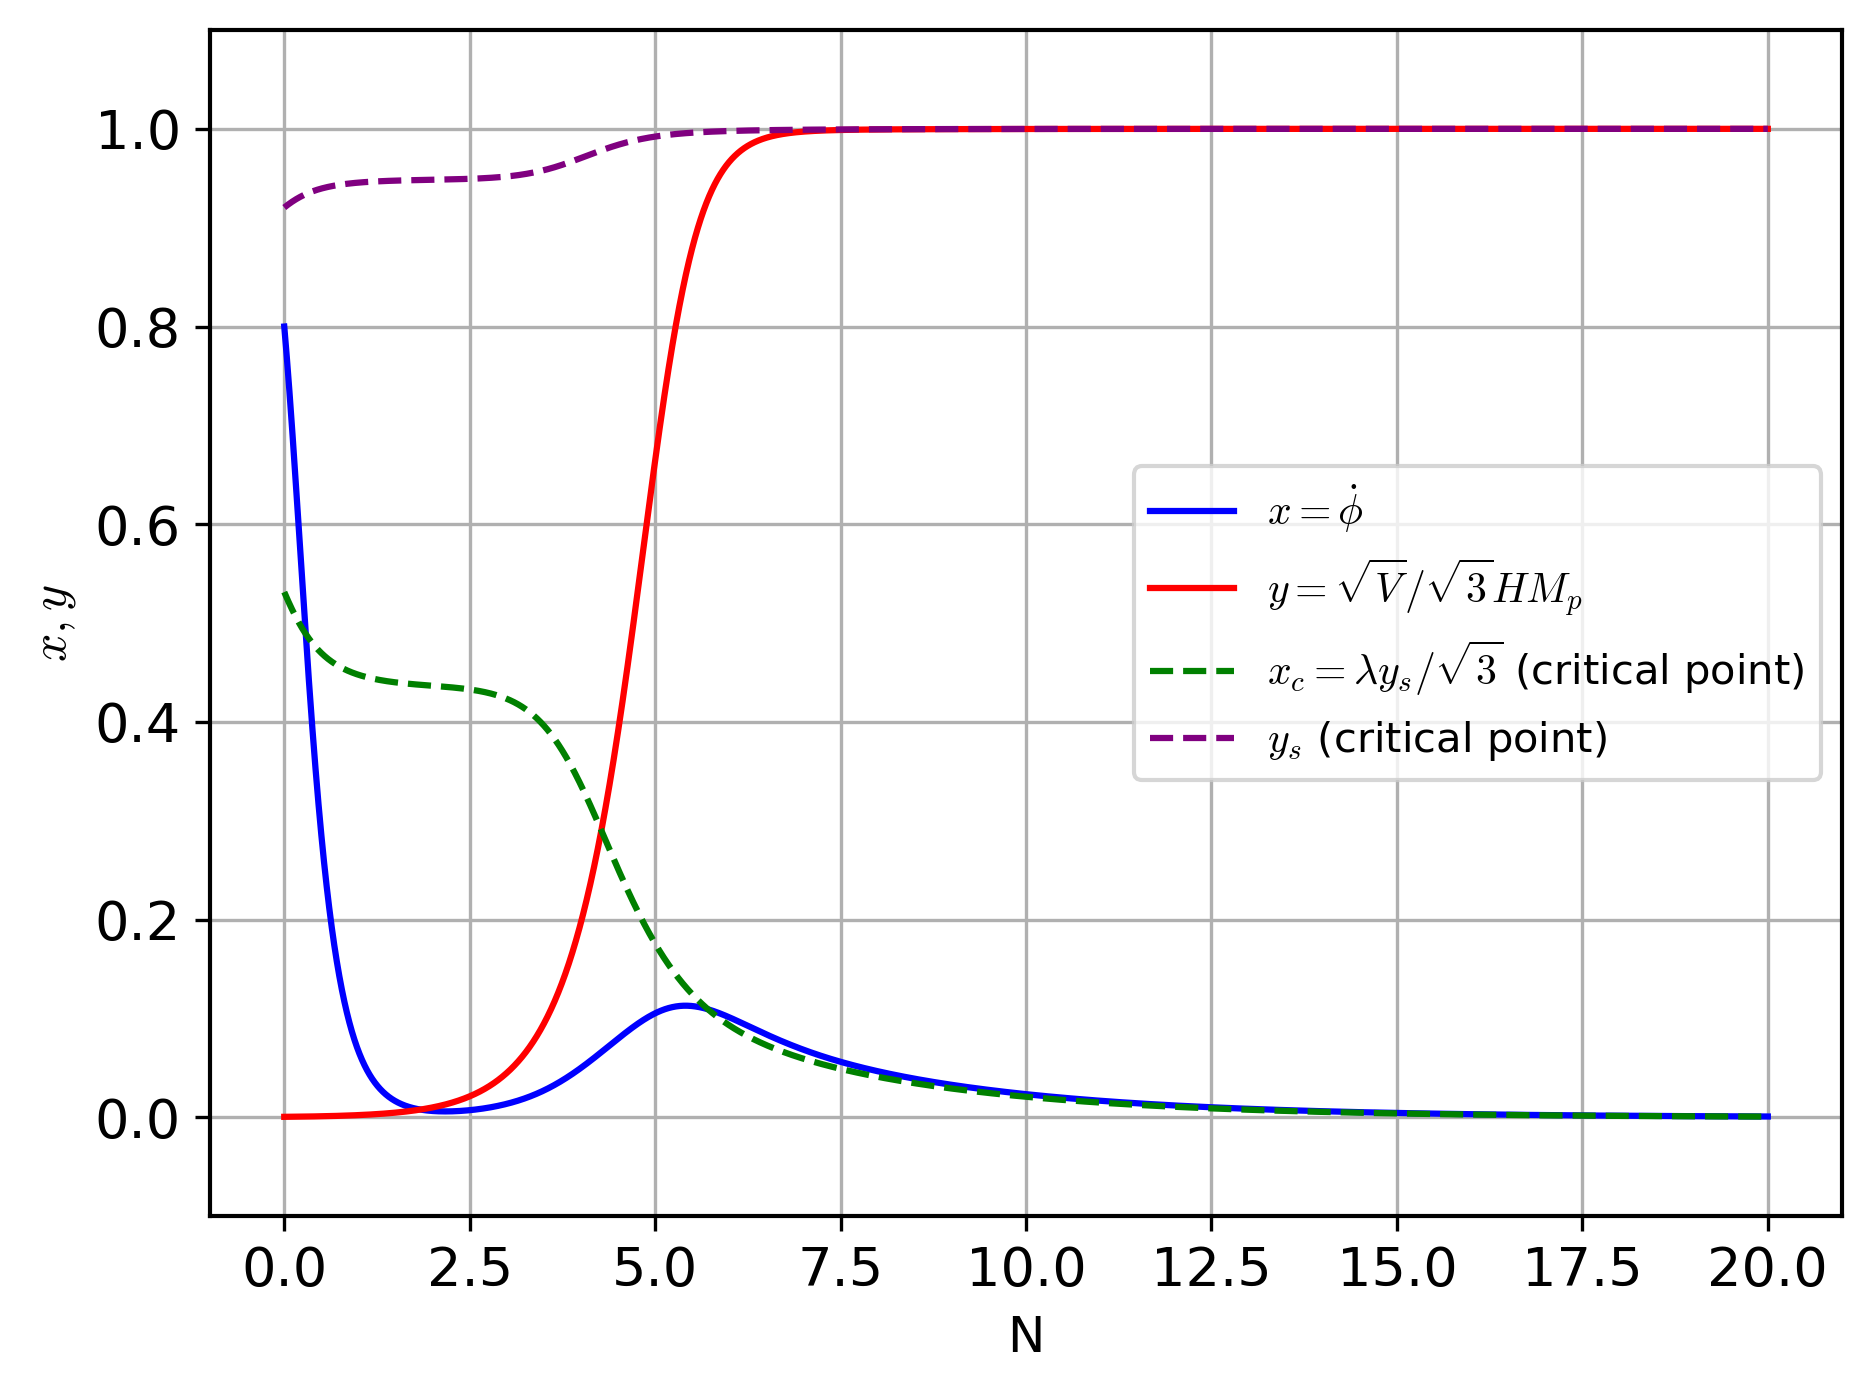

In [11]:
# Evolution of x, y as function of N
plt.plot(N_vals, x_vals, label=r'$x = \dot{\phi}$', color='blue')
plt.plot(N_vals, y_vals, label=r'$y = \sqrt{V}/\sqrt{3}HM_p$', color='red')
plt.plot(N_vals, x_c, '--', label=r'$x_c = \lambda y_s/\sqrt{3}$ (critical point)', color='green')
plt.plot(N_vals, y_s, '--', label=r'$y_s$ (critical point)', color='purple')
plt.ylabel(r'$x, y$')
plt.xlabel('N')
plt.ylim(-0.1, 1.1) # y-axis limits for better visualization
plt.legend()
plt.grid()
plt.savefig('tachyon_evol1.png')

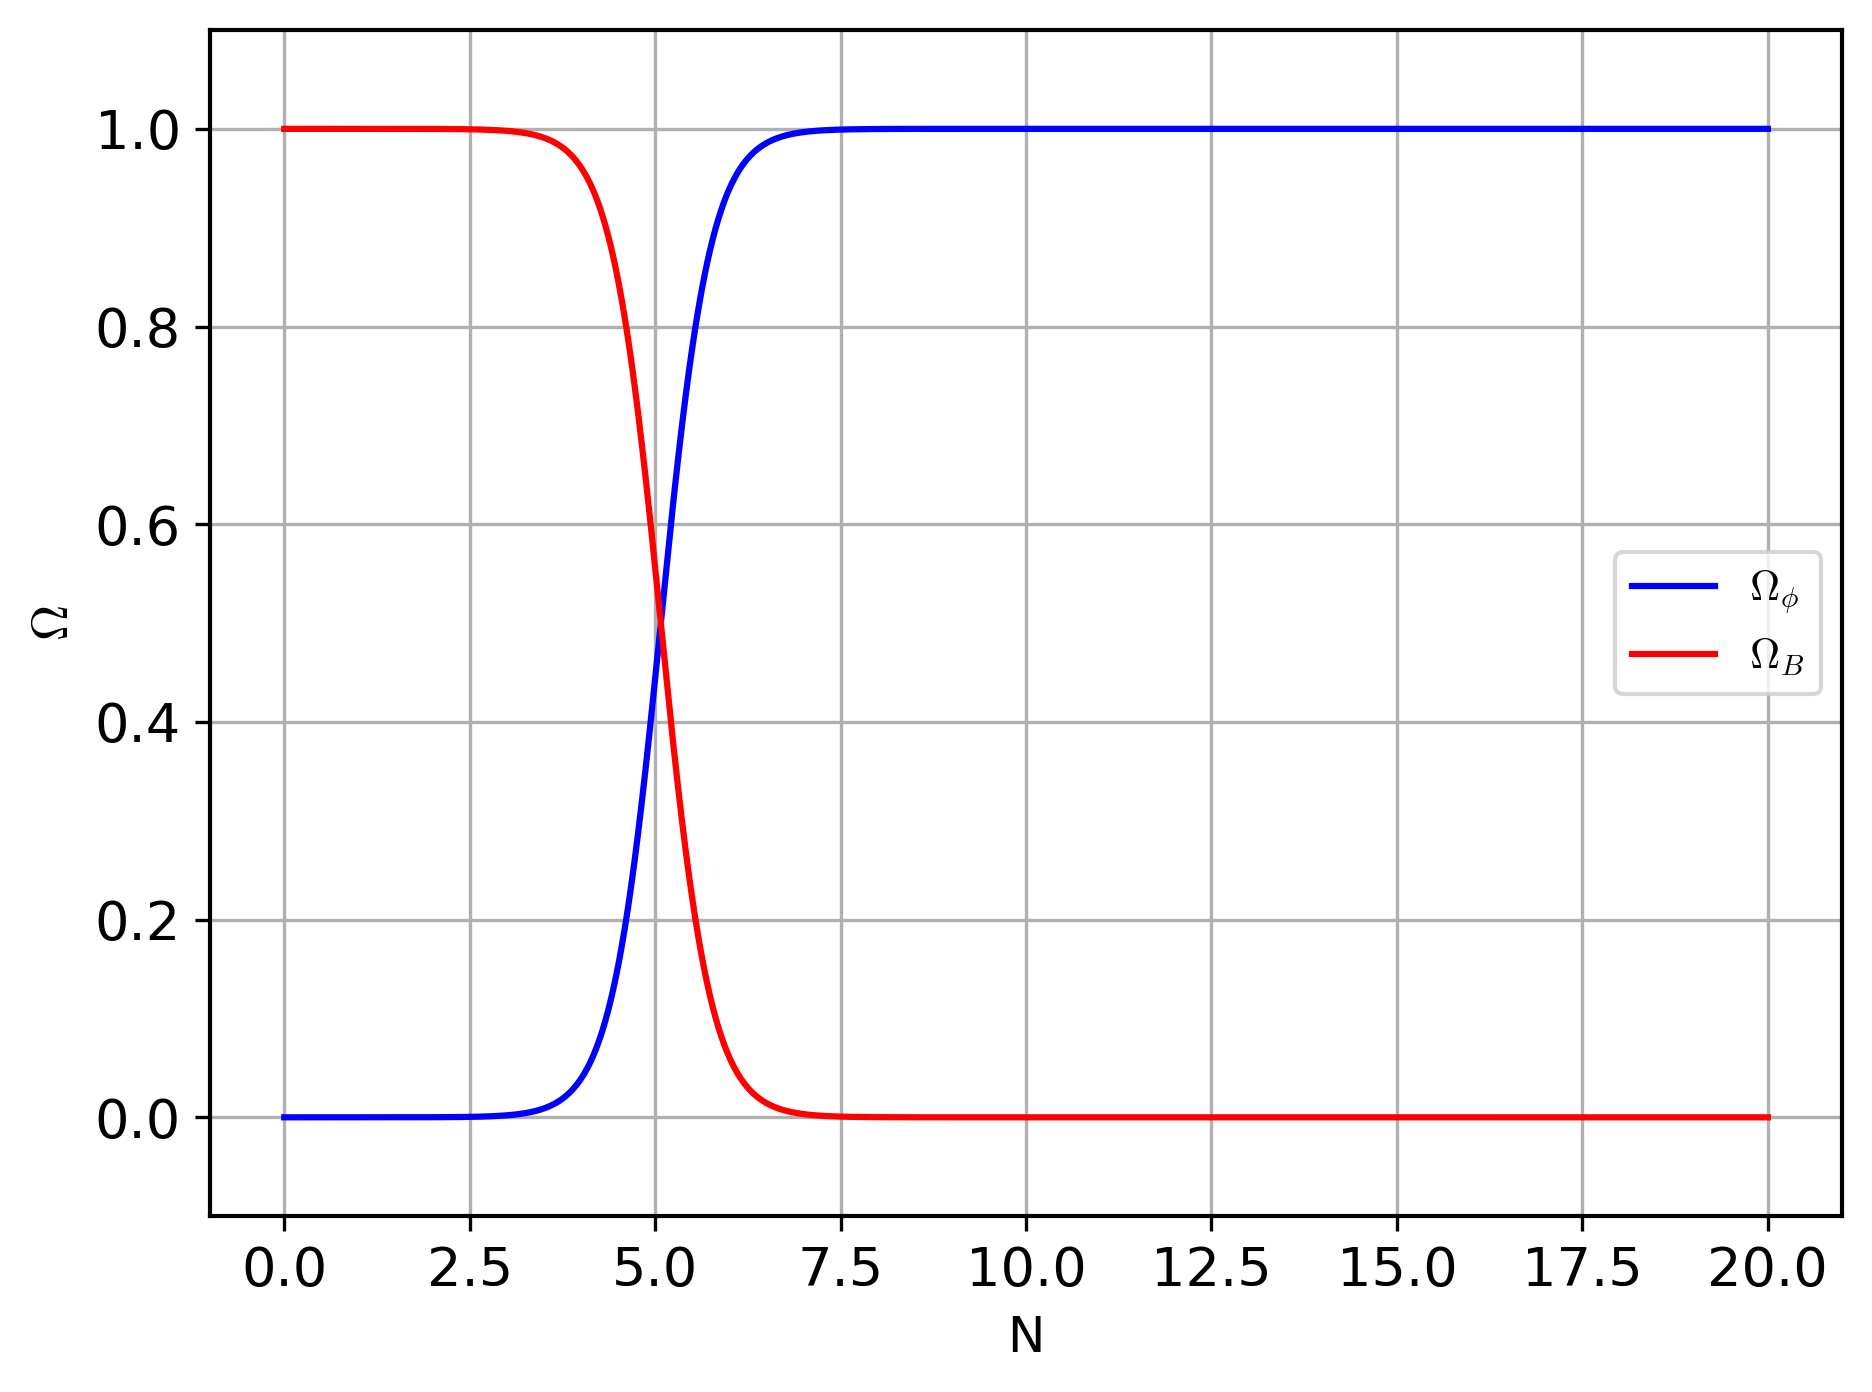

In [12]:
# Evolution of  Omega_phi, Omega_B as function of  N
plt.plot(N_vals, Omega_phi, label=r'$\Omega_\phi$', color='blue')
plt.plot(N_vals, Omega_B, label=r'$\Omega_B$', color='red')
plt.ylabel(r'$\Omega$')
plt.xlabel('N')
plt.ylim(-0.1, 1.1) # y-axis limits for better visualization
plt.legend()
plt.grid()
plt.savefig('tachyon_evol2.png')

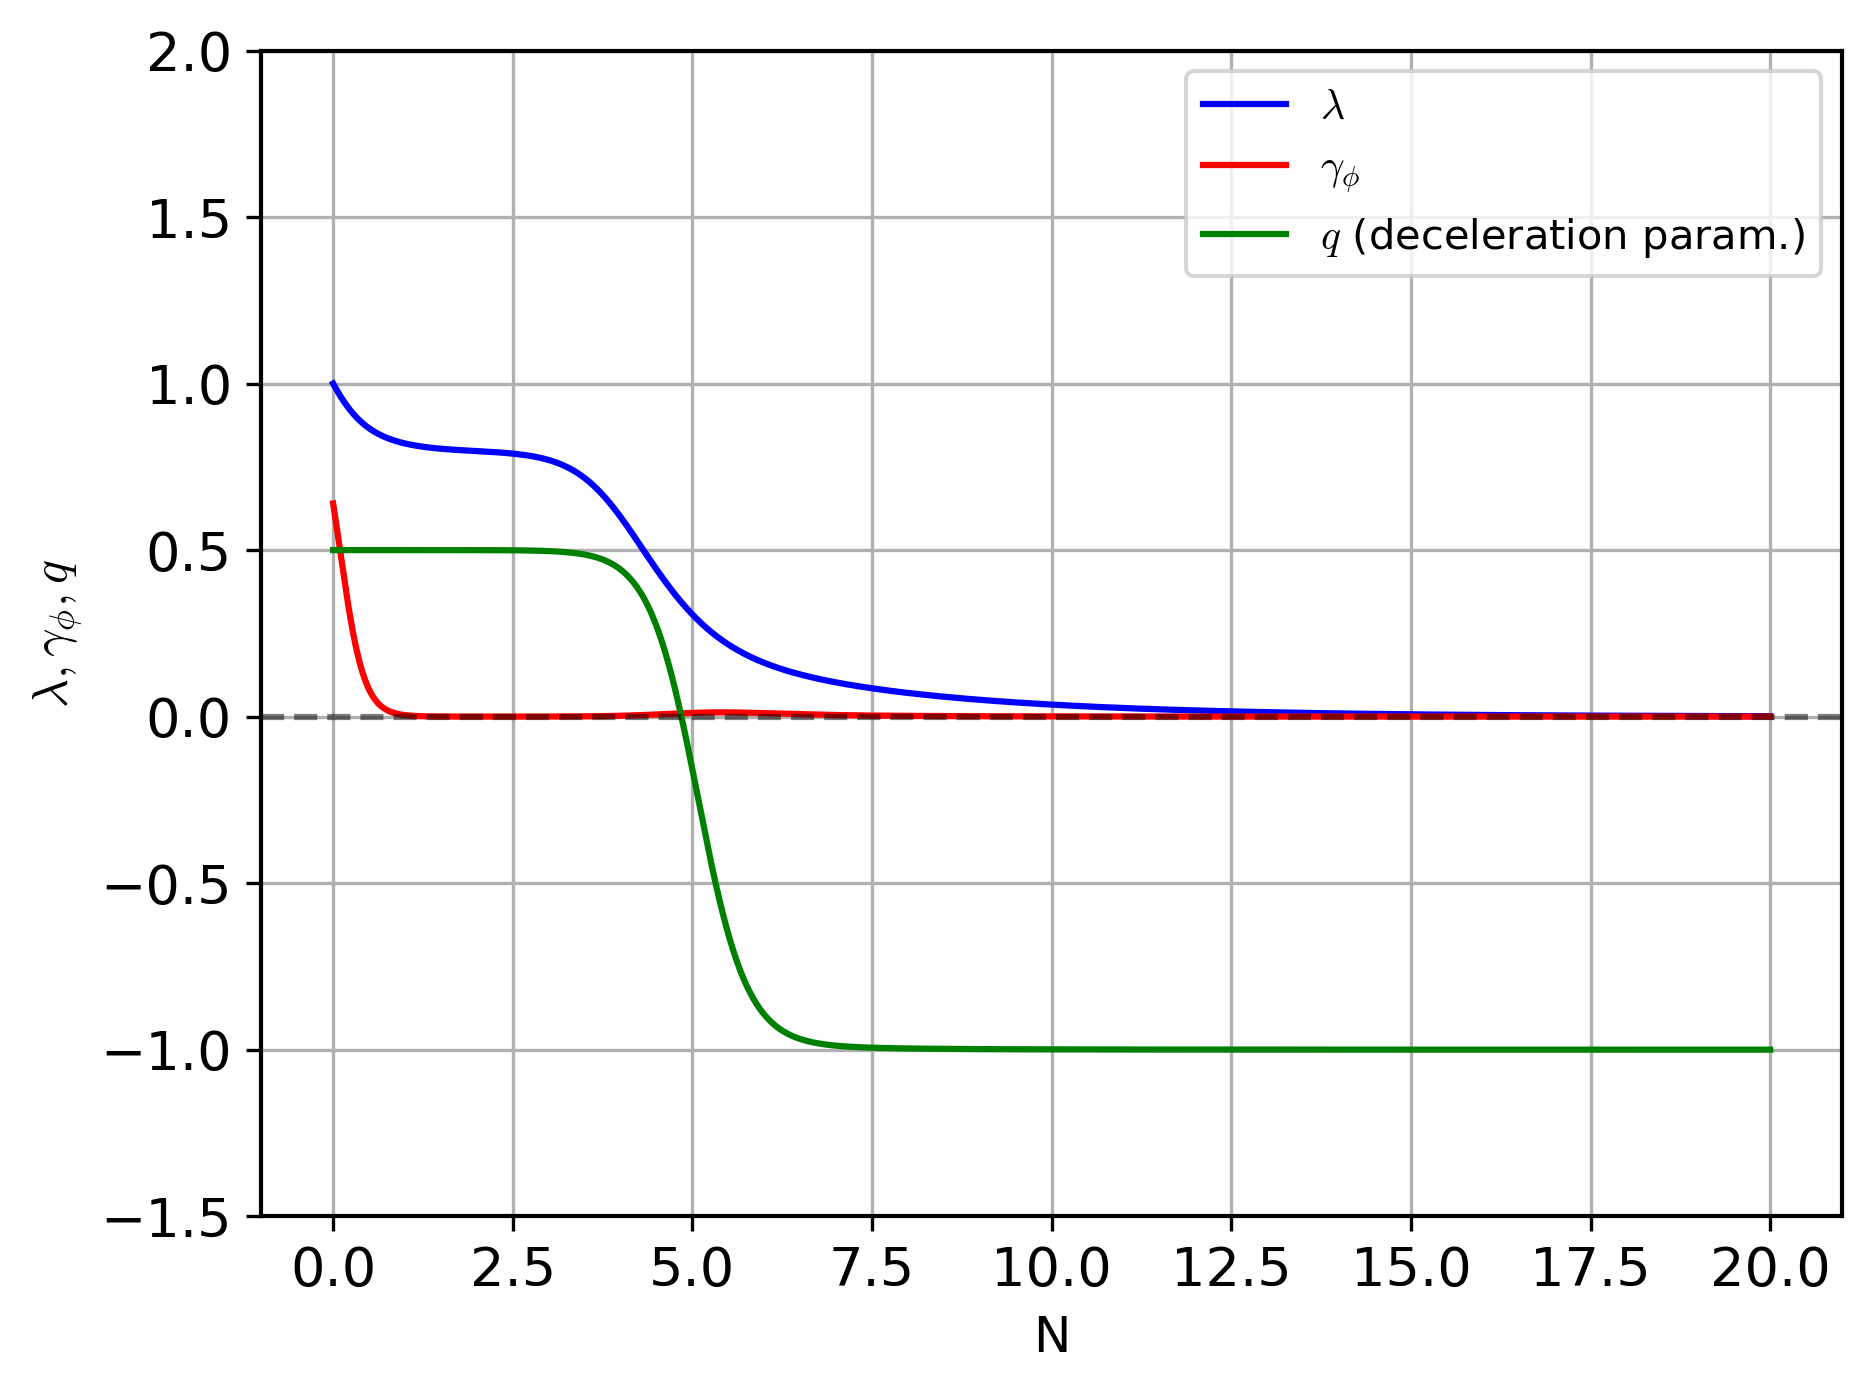

In [13]:
# Evolution of Parameters (lambda, gamma_phi, q as function of N)
plt.plot(N_vals, lam_vals, label=r'$\lambda$', color='blue') # Steepness of the potential
plt.plot(N_vals, gamma_phi, label=r'$\gamma_\phi$', color='red') # EoS parameter of the scalar field
plt.plot(N_vals, q, label=r'$q$ (deceleration param.)', color='green')
plt.axhline(0, linestyle='--', color='black', alpha=0.5) 
plt.xlabel('N') # x-axis label
plt.ylim(-1.5, 2.0) # y-axis limits for better visualization
plt.ylabel(r'$\lambda, \gamma_\phi, q$') # y-axis label
plt.legend()
plt.grid()
plt.savefig('tachyon_evol3.png')